In [1]:
import kagglehub, os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download(
    "nikhil7280/student-performance-multiple-linear-regression"
)

print("Path to dataset files:", path)

/home/rohnak.agarwal/projects/ml-practice/venv312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 48.5k/48.5k [00:00<00:00, 205kB/s]

Extracting files...
Path to dataset files: /home/rohnak.agarwal/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [3]:
df = pd.read_csv(os.path.join(path, "Student_Performance.csv"))
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


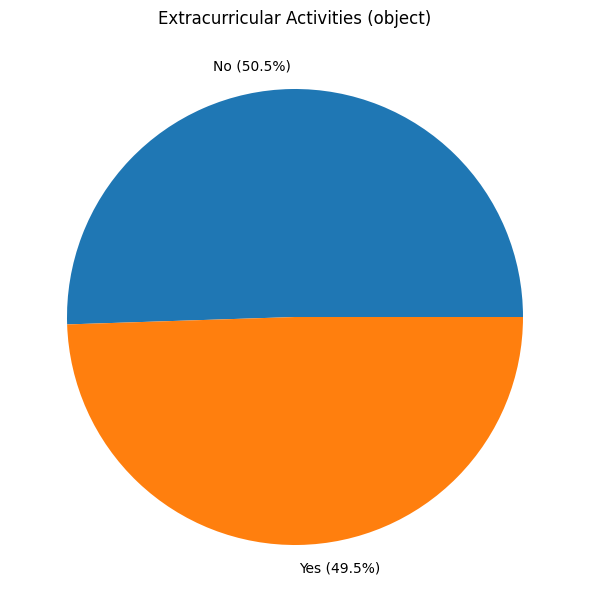

In [8]:
import matplotlib.pyplot as plt

cols = [col for col in df.select_dtypes(["object"])]
num_plots = len(cols)
cols_per_row = 3
rows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 6 * rows))
axes = axes.flatten()

plot_idx = 0
for col in cols:
    unq_vals = df[col].unique()
    if len(unq_vals) > 30:
        print(col, len(unq_vals), "skipping")
        continue

    freq_map = {}
    for val in sorted(unq_vals):
        count = len(df[df[col] == val])
        freq_map[f"{val} ({count * 100 / len(df):.1f}%)"] = count

    ax = axes[plot_idx]
    ax.pie(list(freq_map.values()), labels=list(freq_map.keys()))
    ax.set_title(f"{col} ({df[col].dtype})")
    plot_idx += 1

# Hide any unused axes
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd02deb70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd02df0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1dd03e7b30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd02df500>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd02df830>],
 'means': []}

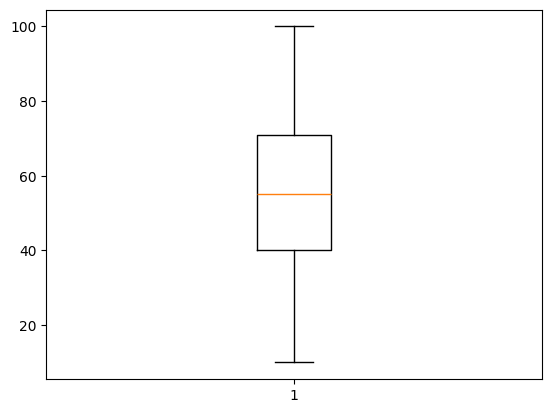

In [9]:
plt.boxplot(df["Performance Index"])